# Logistic Regression (Binary and Multiclass Classification)











## 1. Binary Classification

<br>
In this section, logistic regression is applied to the Breast Cancer dataset to classify tumors as malignant (0) or benign (1). 





The Complete description of the dataset can be found [here](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

### 1.1 ✏️ Data Exploring: 

The dataset is loaded and checked for missing values and summary statistics. Boxplots are used to visualize outliers, and the distribution of the target variable is examined.
<br>

* Hint: download this file "LogisticRegression.py" from ILIAS or GitHub


In [59]:
# Download this file "LogisticRegression.py" from ILIAS or GitHub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from LogisticRegression import LogisticRegressionGD, MultinomialLogisticRegressionGD # Download this file from ILIAS or GitHub
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report, 
                             precision_recall_curve, average_precision_score, 
                             roc_curve, roc_auc_score, ConfusionMatrixDisplay, auc)

# Load dataset
data = load_breast_cancer()
df_1 = pd.DataFrame(data.data, columns=data.feature_names)
df_1['target'] = data.target

X, y = data.data, data.target

# Display basic information about the dataset
df_1.info()

# Display first few rows
df_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


1. Check for missing values. Print the number of missing values in each column of df_1.

In [60]:
# TODO: Implement
nans = df_1.isna().sum().rename("count_NaN")
print (nans)

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
Name: count_NaN, dtype: int64


2. Obtain and display the summary statistics for the dataset stored in df_1.

In [61]:
# TODO: Implement
display(df_1.describe())


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


3. Draw boxplots for each feature in df_1 to visualize outliers. What do you think? Can we delete some observations?

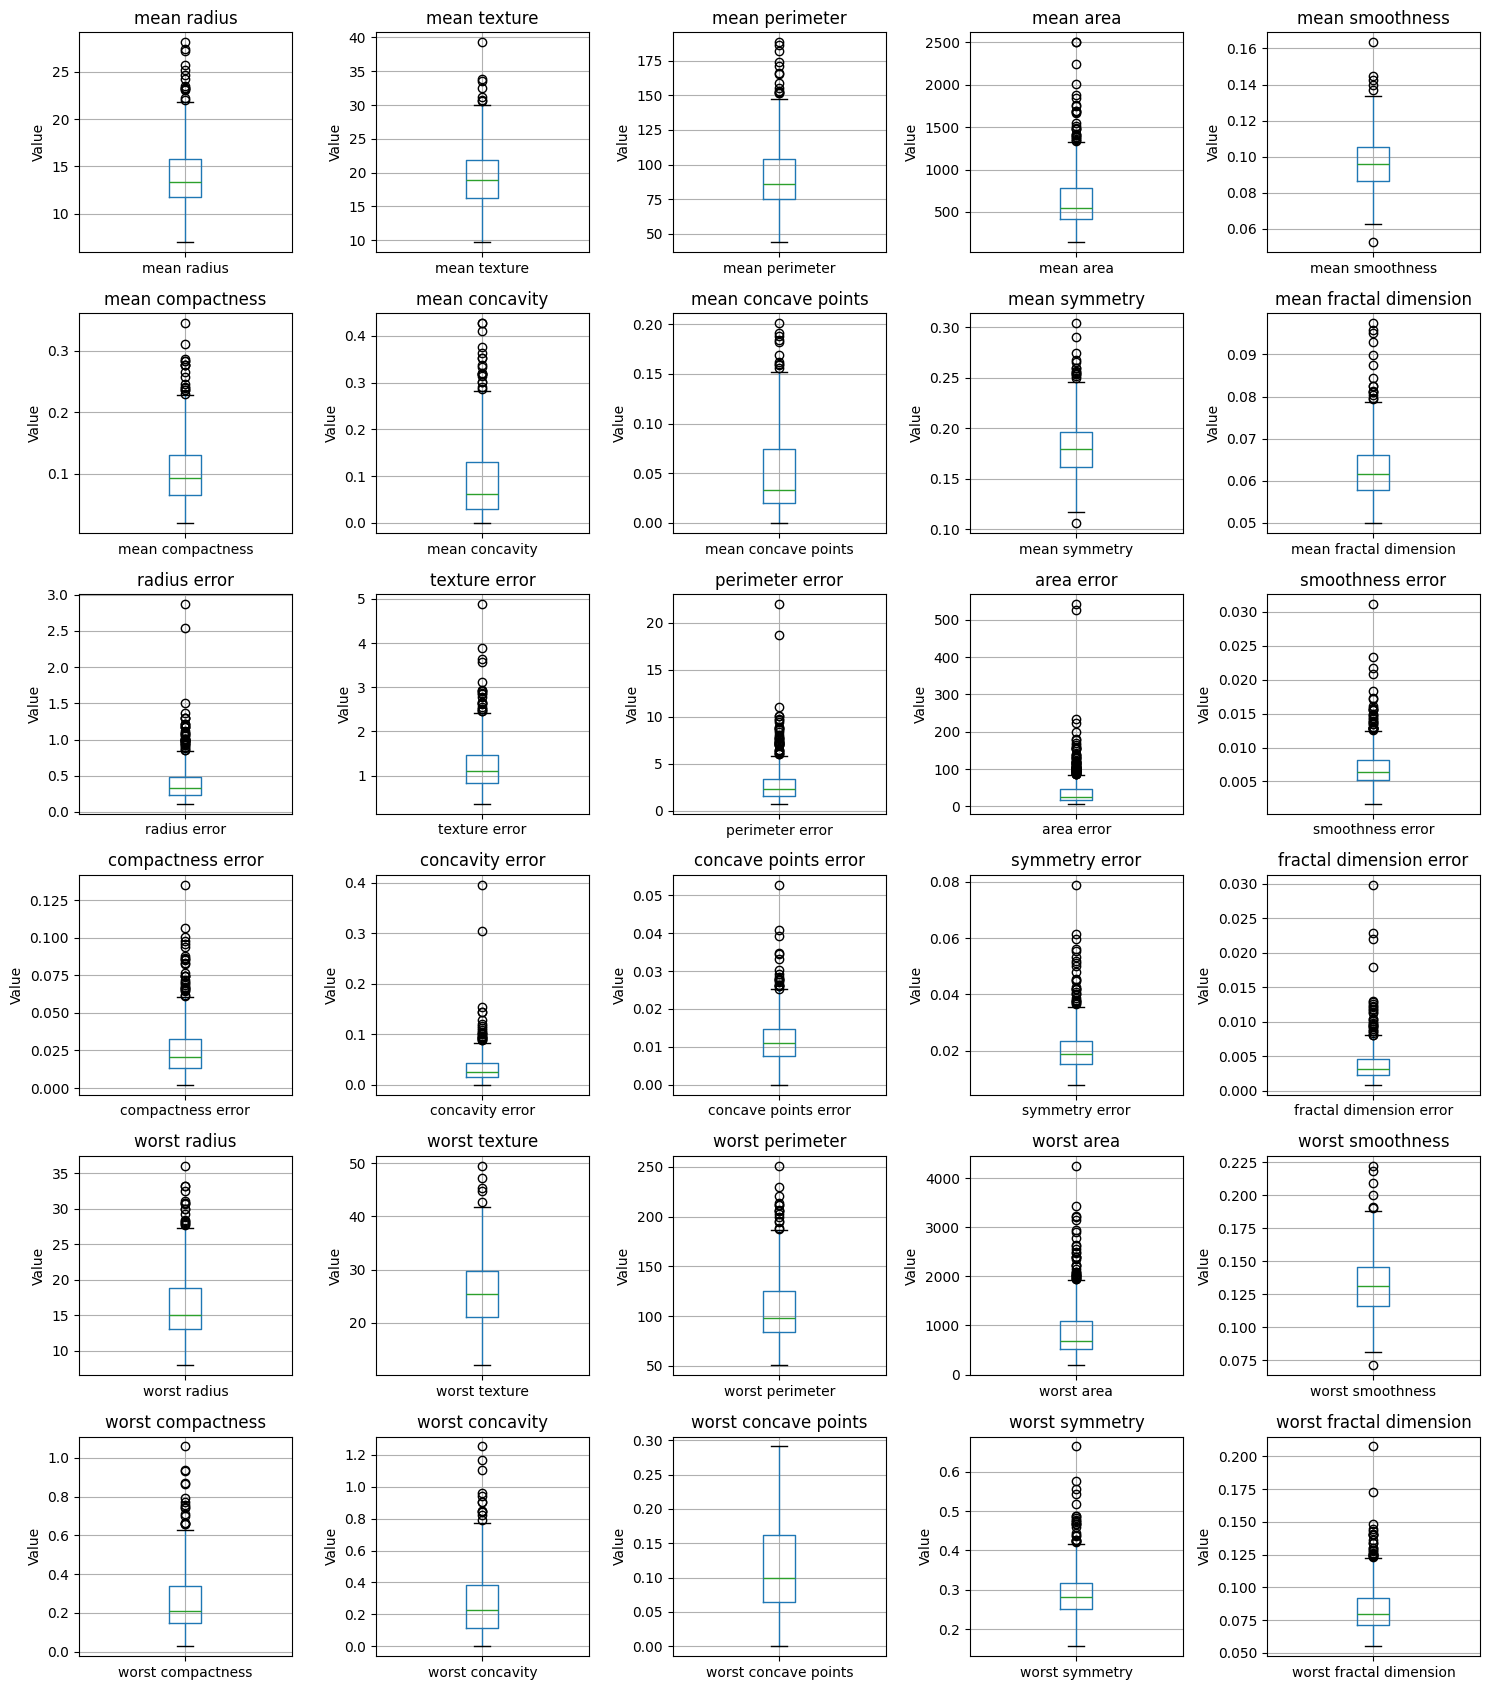

In [62]:
# TODO: Implement
dfeature= df_1.describe()
n_cols = 5
df_1_excluded = dfeature.iloc[:, :-1]
n_rows = (len(df_1_excluded.columns) + n_cols - 1) // n_cols  
fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, 17))  
ax = ax.flatten()
for i, colname in enumerate(df_1_excluded.columns):
    df_1.boxplot(column=colname, ax=ax[i])
    ax[i].set_title(colname)
    ax[i].set_ylabel('Value')

plt.tight_layout()
plt.show()

# I think the area error and worst concave points observaions can be deleted.

4. Plot the distribution of the target variable in df_1, labeling the classes as 'Malignant' and 'Benign'.








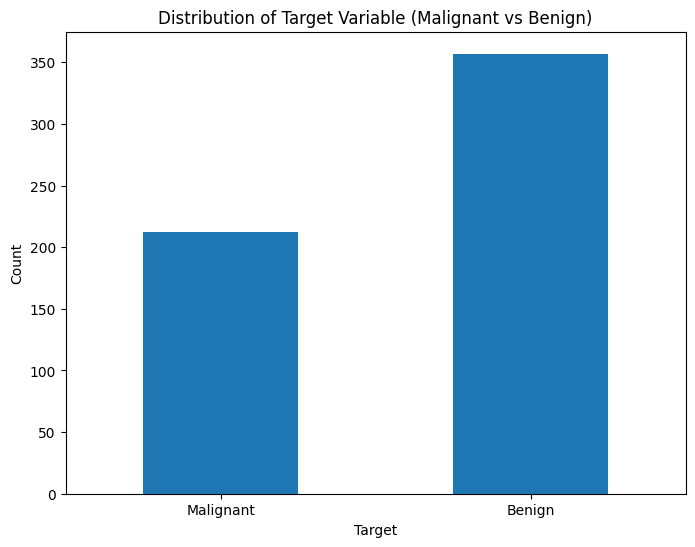

In [63]:
# TODO: Implement
df_1['target'] = df_1['target'].map({0: 'Malignant', 1: 'Benign'})

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
df_1['target'].value_counts().reindex(['Malignant', 'Benign']).plot(kind='bar')
plt.title('Distribution of Target Variable (Malignant vs Benign)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### 1.2 Data Splitting
The dataset is split into training and testing sets."stratify = y" ensures that the class distribution in the target variable y is preserved in both the training and test sets.
<br>
To check that, the ratios of class 0 to class 1 for the overall dataset, the training set, and the test set are calculated in the following:

In [64]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  stratify= y, random_state=0)

# Check the class distribution in the training and test sets
# Effect of (stratify=y) on Class Ratios
class_distribution = Counter(y)
train_class_distribution = Counter(y_train)
test_class_distribution = Counter(y_test)

overall_ratio = class_distribution[0] / class_distribution[1]
train_ratio = train_class_distribution[0] / train_class_distribution[1]
test_ratio = test_class_distribution[0] / test_class_distribution[1]

print("Dataset class distribution:", Counter(y))
print("Training set class distribution:", Counter(y_train))
print("Test set class distribution:", Counter(y_test))
print("Overall class ratio (0 to 1):", overall_ratio)
print("Training set class ratio (0 to 1):", train_ratio)
print("Test set class ratio (0 to 1):", test_ratio)

Dataset class distribution: Counter({1: 357, 0: 212})
Training set class distribution: Counter({1: 285, 0: 170})
Test set class distribution: Counter({1: 72, 0: 42})
Overall class ratio (0 to 1): 0.5938375350140056
Training set class ratio (0 to 1): 0.5964912280701754
Test set class ratio (0 to 1): 0.5833333333333334


The class distribution is similar in both the training and test sets.

### 1.3 Applying Logistic Regression (Custom Implementaion)
#### 1.3.1 Pipeline_1
LogisticRegressionGD() is a custom logistic regression implementation using gradient descent as a solver (optimization algorithm to estimate the model parameters). It is imported from a python file "LogisticRegression". You can find this python file in ILIAS or in GitHub.

* A pipeline_1 is created to streamline the preprocessing and model training process.
* "StratifiedKFold" is a variation of k-fold which returns stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set. That can maintain the class distribution in each fold. You can read more about it [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html).
* grid_search_1 is used to tune the hyperparameter (learning rate) 
* The ROC AUC "ROC- Area Under the Curve" score is used to evaluate model performance. [Possible metrics for scoring can be found here](https://scikit-learn.org/stable/modules/model_evaluation.html)
* The loss of the best estimator over the iterations (epochs) using the results from grid_search_1 is shown.
* The best model is then evaluated on the test set.

In [65]:
# Create pipeline
pipeline_1 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegressionGD(epochs=1000, random_state=0))
])

# Define hyperparameters
param_grid_1 = {
    'classifier__lr': [0.001, 0.01, 0.02, 0.03]    
}

# Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV
grid_search_1 = GridSearchCV(pipeline_1, param_grid_1, cv=cv, scoring='roc_auc')
grid_search_1.fit(X_train, y_train)

# Show the best hyperparameter
display("Best parameters:", grid_search_1.best_params_)

'Best parameters:'

{'classifier__lr': 0.001}

In the following is the Plot the binary cross-entropy loss of the best estimator over the iterations (epochs) using the results from grid_search_1.

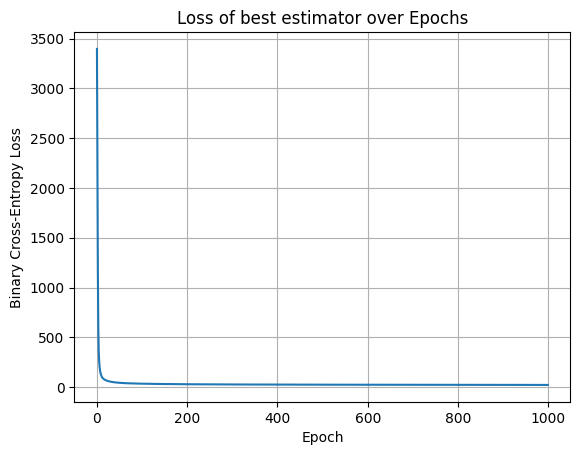

In [66]:
# plot the loss of the best estimater over the iterations (epochs)
plt.plot(np.arange(0, grid_search_1.best_estimator_[1].epochs), grid_search_1.best_estimator_[1].loss)
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Loss of best estimator over Epochs")
plt.grid(True)

The best model is then evaluated on the test set using the confusion matrix and classification report from scikit-learn.


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



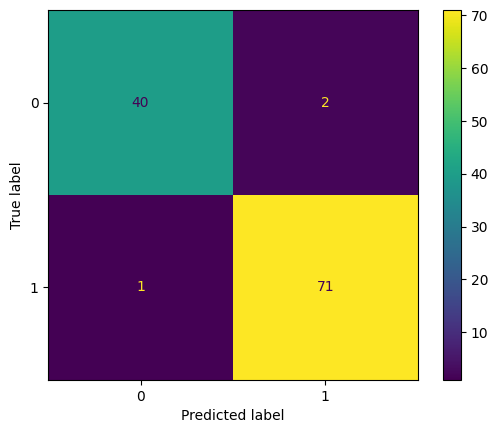

In [67]:
# Evaluation
y_pred_1 = grid_search_1.predict(X_test)

# Confusion Matrix
cm_1=confusion_matrix( y_test, y_pred_1)
disp_1 = ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels=grid_search_1.best_estimator_[1].classes_)
disp_1.plot()

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_1))


Precision-Recall Curve and calculating the Average Precision Score for the best model 

Average Precision Score: 0.9958378095953665


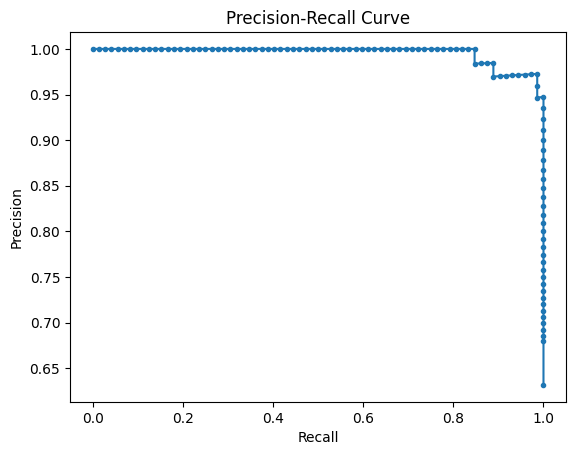

In [68]:
# Precision-Recall Curve
y_scores_1 = grid_search_1.predict_proba(X_test)[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores_1)

# Average Precision
average_precision_1 = average_precision_score(y_test, y_scores_1)
print(f"Average Precision Score: {average_precision_1}")

plt.figure()
plt.plot(recalls, precisions, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

ROC Curve plot and calculating the ROC-AUC Score for the best model 

ROC AUC Score: 0.9930555555555556


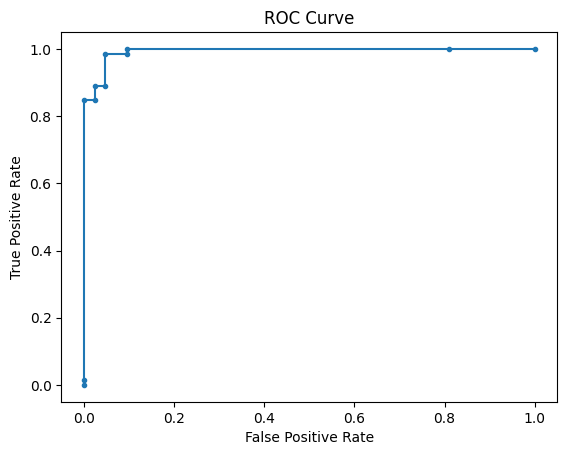

In [69]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_1)

# ROC Area Under the Curve
roc_auc_1 = roc_auc_score(y_test, y_scores_1)
print(f"ROC AUC Score: {roc_auc_1}")

plt.figure()
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### 1.3.2 ✏️Pipeline_2
1. Set up pipeline_2
* Add a PCA step to pipeline_1 before the classifier.
* Use the classifier: LogisticRegressionGD(epochs=1000, random_state=0).
* Tune the hyperparameters:
  * 'classifier__lr' using the list: [0.001, 0.006, 0.01]
  * The number of components for PCA within the range: 2 to 16
* Perform a grid search (grid_search_2) with 5 StratifiedKFold cross-validation to find the best model parameters. 
 * scoring='roc_auc'
* Display the best hyperparameters.

In [70]:
# TODO: Implement
pipeline_2 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', LogisticRegressionGD(epochs=1000, random_state=0))
])

# Define hyperparameters
param_grid_2 = {
    'pca__n_components': np.arange(2, 17),
    'classifier__lr': [0.001, 0.006, 0.01],  
}

# Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV
grid_search_2 = GridSearchCV(pipeline_2, param_grid_2, cv=cv, scoring='roc_auc')
grid_search_2.fit(X_train, y_train)

# Show the best hyperparameter
display("Best parameters:", grid_search_2.best_params_)


'Best parameters:'

{'classifier__lr': 0.001, 'pca__n_components': 9}

2. Plot the binary cross-entropy loss of the best estimator over the iterations (epochs) using the results from grid_search_2. 

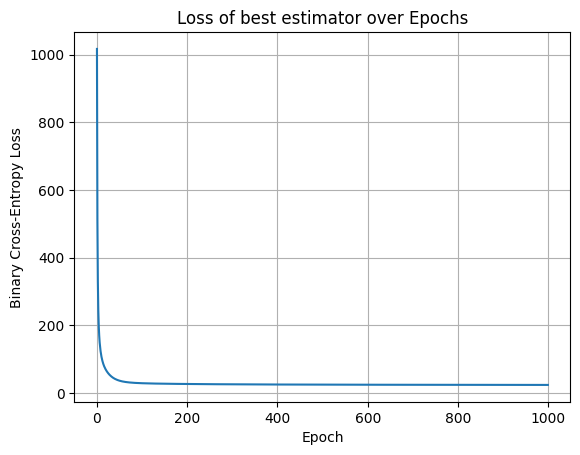

In [13]:
# TODO: Implement
# plot the loss of the best estimater over the iterations (epochs)
plt.plot(np.arange(0, grid_search_2.best_estimator_[2].epochs), grid_search_2.best_estimator_[2].loss)
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Loss of best estimator over Epochs")
plt.grid(True)

3. Evaluate the best model using confusion matrix and classification report from scikit-learn


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        42
           1       0.96      1.00      0.98        72

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



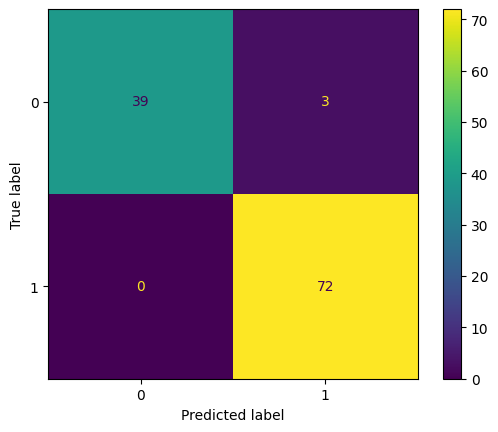

In [14]:
# Evaluation
y_pred_1 = grid_search_2.predict(X_test)

# Confusion Matrix
cm_1=confusion_matrix( y_test, y_pred_1)
disp_1 = ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels=grid_search_2.best_estimator_[2].classes_)
disp_1.plot()

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_1))



4. Calculate the total explained variance by the principal components used in the best estimator found by grid_search_2.

In [15]:
# TODO: Implement
Explained_Variance = np.sum(grid_search_2.best_estimator_.named_steps['pca'].explained_variance_ratio_)
print ("Explained Variance ", Explained_Variance)

Explained Variance  0.9417624933140067


5. Plot the Precision-Recall Curve and calculate the Average Precision Score for the model using PCA, then compare it with a model without PCA.

Average Precision Score with PCA: 0.9967130930996058


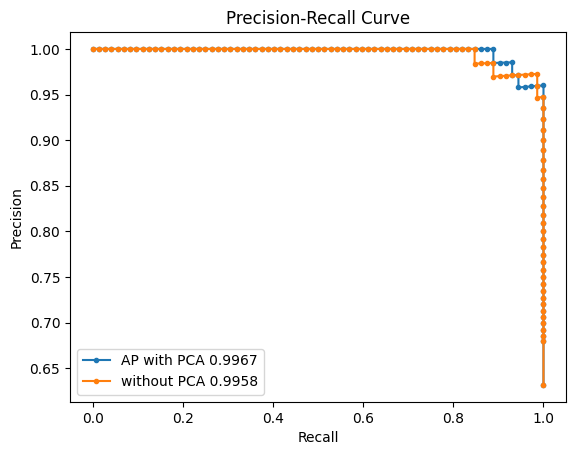

In [16]:
# TODO: Implement
# Precision-Recall Curve
y_scores_2 = grid_search_2.predict_proba(X_test)[:,1]
precisions1, recalls1, thresholds1 = precision_recall_curve(y_test, y_scores_2)

# Average Precision
average_precision_2 = average_precision_score(y_test, y_scores_2)
print(f"Average Precision Score with PCA: {average_precision_2}")

plt.figure()
plt.plot(recalls1, precisions1, marker='.', label='AP with PCA {:.4f}'.format(average_precision_2))
plt.plot(recalls, precisions, marker='.', label='without PCA {:.4f}'.format(average_precision_1))
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


6. Plot the ROC Curve and calculate the ROC-AUC Score for the model using PCA, then compare it with a model without PCA.

ROC AUC Score with PCA: 0.9943783068783069


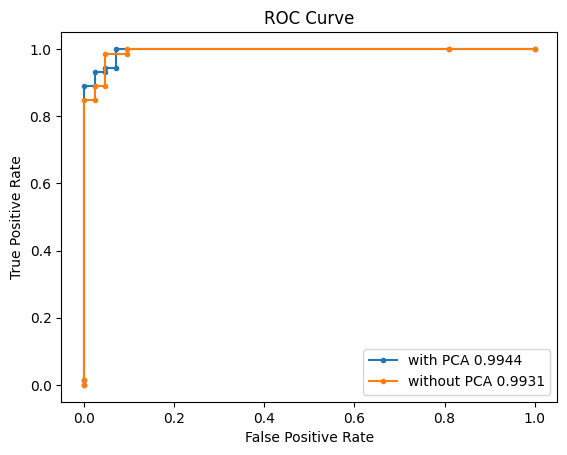

In [17]:
# TODO: Implement
# ROC Curve
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_scores_2)

# ROC Area Under the Curve
roc_auc_2 = roc_auc_score(y_test, y_scores_2)
print(f"ROC AUC Score with PCA: {roc_auc_2}")

plt.figure()
plt.plot(fpr1, tpr1, marker='.', label='with PCA {:.4f}'.format(roc_auc_2))
plt.plot(fpr, tpr, marker='.', label='without PCA {:.4f}'.format(roc_auc_1))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


### 1.4 Applying Logistic Regression (from scikit-learn)
#### 1.4.1 Pipeline_3
LogisticRegression() classifier from scikit-learn is applied. It can be optimizied by several optimization algorithm (solvers). [Here ia a comparision between them](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

* grid_search_3 is used to choose the best optimization method for breast cancer dataset.
* classifier__solver refers to the algorithm used for optimization, with different solvers provided for tuning.

In [18]:
# Create pipeline
pipeline_3 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Define hyperparameters
param_grid_3 = {
    
    'classifier__solver': ['sag', 'saga','lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky' ]
}

# Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV
grid_search_3 = GridSearchCV(pipeline_3, param_grid_3, cv=cv, scoring='roc_auc')
grid_search_3.fit(X_train, y_train)

# Show the best hyperparameter
display("Best parameters:", grid_search_3.best_params_)

'Best parameters:'

{'classifier__solver': 'sag'}

The best model is then evaluated on the test set using the confusion matrix and classification report from scikit-learn.


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Average Precision Score: 0.9974301219609739
ROC AUC Score: 0.9957010582010581


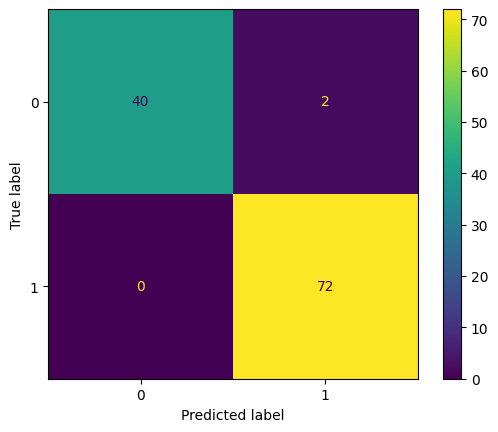

In [19]:
# Evaluation
y_pred_3 = grid_search_3.predict(X_test)

cm_3 = confusion_matrix( y_test, y_pred_3)
disp_3 = ConfusionMatrixDisplay(confusion_matrix=cm_3, display_labels=grid_search_3.best_estimator_[1].classes_)
disp_3.plot()
print("\nClassification Report:\n", classification_report(y_test, y_pred_3))

y_scores_3 = grid_search_3.predict_proba(X_test)[:,1]
average_precision_3 = average_precision_score(y_test, y_scores_3)
roc_auc_3 = roc_auc_score(y_test, y_scores_3)

print(f"Average Precision Score: {average_precision_3}")
print(f"ROC AUC Score: {roc_auc_3}")


#### 1.4.2 ✏️Pipeline_4
1. Set up pipeline_4

* Add a PCA step to pipeline_3 before the classifier.
* Use the classifier: LogisticRegression(max_iter=1000)
* Tune the hyperparameters:
  * 'classifier__solver': ['sag', 'saga','lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky' ]
  * The number of components for PCA within the range: 2 to 20
* Perform a grid search (grid_search_4) with 5 StratifiedKFold cross-validation to find the best model parameters. 
 * scoring='roc_auc'
* Display the best hyperparameters.

In [20]:
# TODO: Implement
# Create pipeline_4 by adding PCA to pipeline_3
pipeline_4 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Define hyperparameters for pipeline_4
param_grid_4 = {
    'classifier__solver': ['sag', 'saga', 'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky'],
    'pca__n_components': np.arange(2, 21, 1)
}
# Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV for pipeline_4
grid_search_4 = GridSearchCV(pipeline_4, param_grid_4, cv=cv, scoring='roc_auc')
grid_search_4.fit(X_train, y_train)

# Show the best hyperparameters for pipeline_4
print("Best parameters:", grid_search_4.best_params_)

Best parameters: {'classifier__solver': 'liblinear', 'pca__n_components': 18}


2. Evaluate the best model on the test set using confusion matrix and classification report from scikit-learn


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Average Precision Score: 0.9968350568024569
ROC AUC Score: 0.9947089947089947


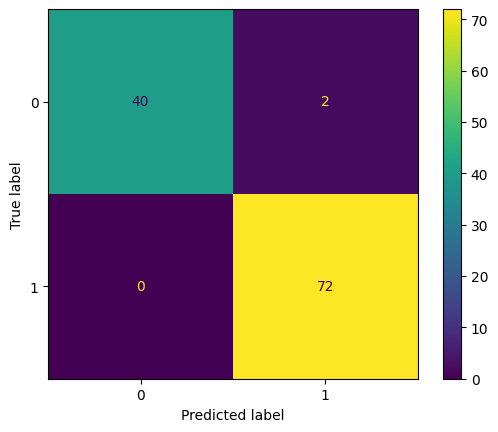

In [21]:
# TODO: Implement
# Evaluation
y_pred_4 = grid_search_4.predict(X_test)

cm_4 = confusion_matrix( y_test, y_pred_4)
disp_4 = ConfusionMatrixDisplay(confusion_matrix=cm_4, display_labels=grid_search_4.best_estimator_[2].classes_)
disp_4.plot()
print("\nClassification Report:\n", classification_report(y_test, y_pred_4))

y_scores_4 = grid_search_4.predict_proba(X_test)[:,1]
average_precision_4 = average_precision_score(y_test, y_scores_4)
roc_auc_4 = roc_auc_score(y_test, y_scores_4)

print(f"Average Precision Score: {average_precision_4}")
print(f"ROC AUC Score: {roc_auc_4}")

3. Calculate the Average Precision Score and the ROC-AUC Score for the model using PCA

In [22]:
# TODO: Implement
average_precision_4 = average_precision_score(y_test, y_scores_4)
print(f"Average Precision Score: {average_precision_4}")
roc_auc_4 = roc_auc_score(y_test, y_scores_4)
print(f"ROC AUC Score: {roc_auc_4}")

Average Precision Score: 0.9968350568024569
ROC AUC Score: 0.9947089947089947


4. Disscuss the results.

In [23]:
# TODO: Implement
# using PCA there is not much imrpovement, it is nearly negligible.


## 2. Multiclass Classification

In this section, logistic regression is applied to the Steel Plates Faults dataset to classify the steel plates into 7 different types ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']




Further information about the dataset can be found [here](https://archive.ics.uci.edu/dataset/198/steel+plates+faults)


### 2.1 ✏️ Data Exploring: 

The dataset is loaded and checked for missing values and summary statistics. Boxplots are used to visualize outliers, and the distribution of the target variable is examined.

In [24]:
# Load the dataset
file_path = 'data/faults.csv'
df_2 = pd.read_csv(file_path)

# Display basic information about the dataset
df_2.info()

# Display first few rows
df_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


Checking for missing values in df_2. 

In [25]:
# Check for missing values
missing_values = df_2.isnull().sum()
# Display missing values
print(missing_values)

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64


1. Obtain and display the summary statistics for the dataset stored in df_2.

In [26]:
# TODO: Implement
display(df_2.describe())

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.083288,-0.131305,0.585420,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.500868,0.148767,0.339452,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,-0.333300,-0.195000,0.248200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.095200,-0.133000,0.506300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.511600,-0.066600,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Boxplots for each feature in df_2

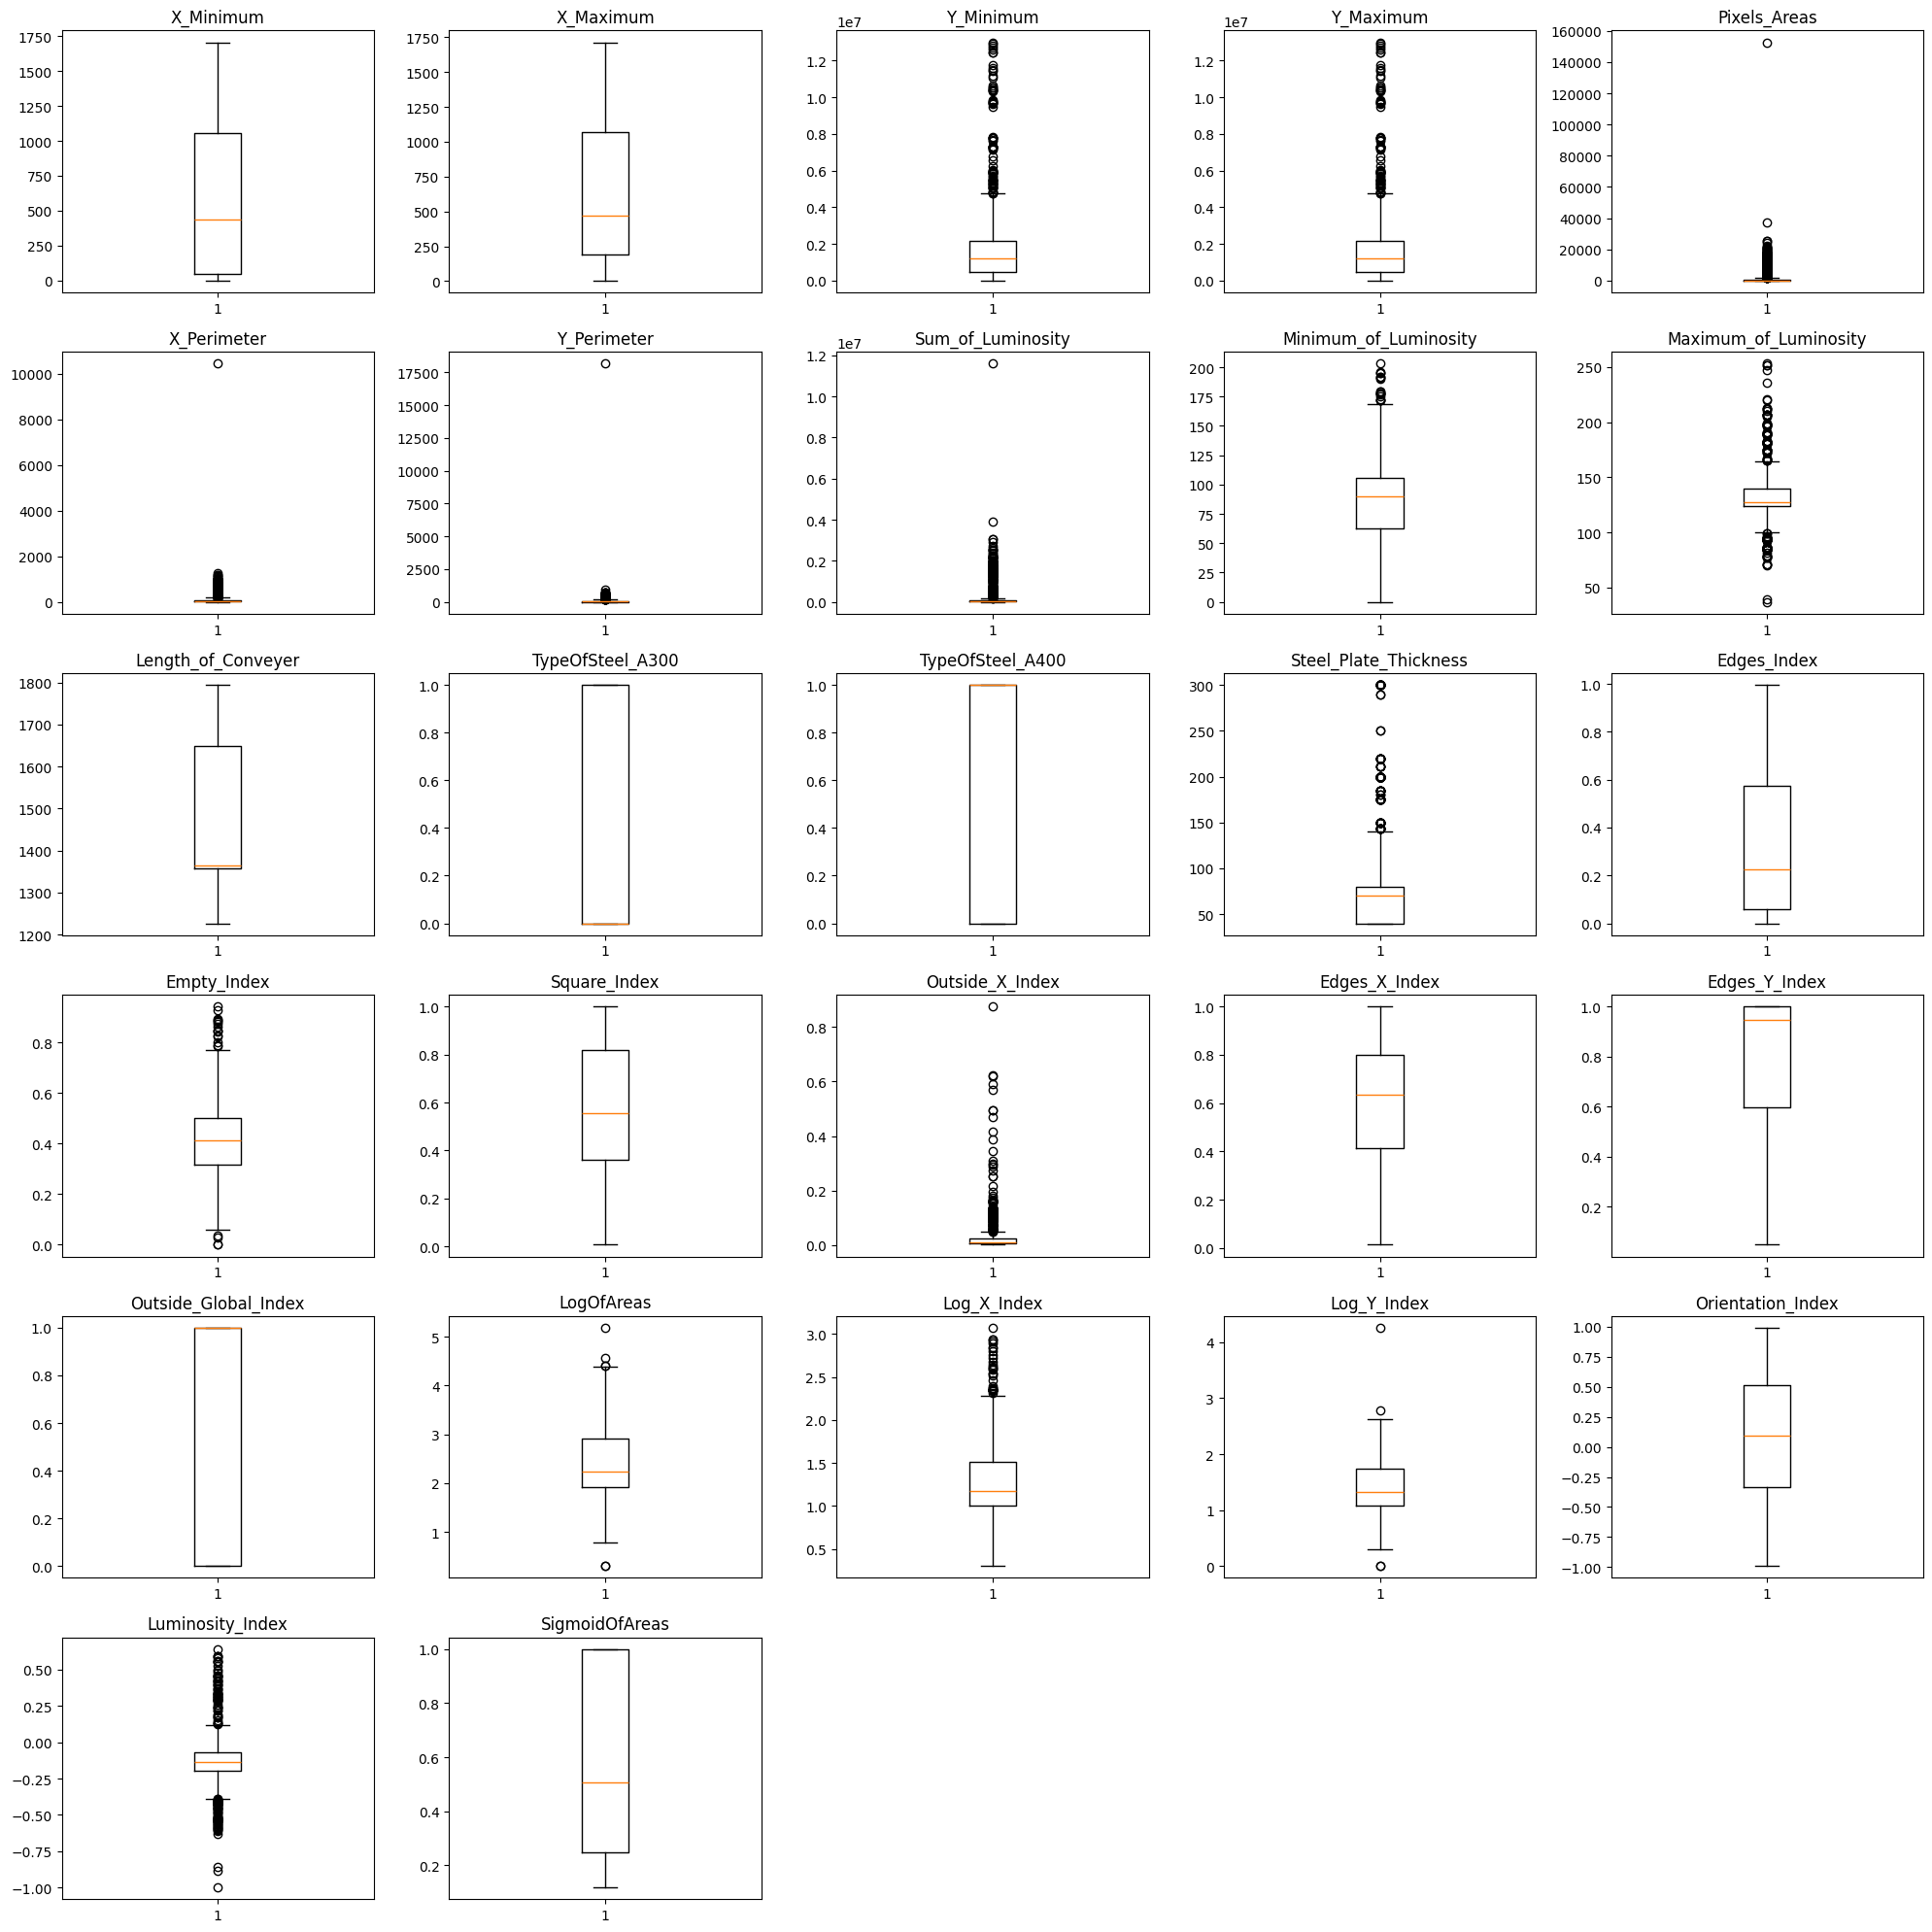

In [27]:
# Draw boxplots for each feature to visualize outliers
plt.figure(figsize=(20, 20))
for i, column in enumerate(df_2.columns[:-7], 1):  # Exclude the target column
    plt.subplot(6, 5, i)
    plt.boxplot(df_2[column])
    plt.title(column)

plt.tight_layout()
plt.show()

 Combine the fault types into a single target variable

In [28]:
# Combine the fault types into a single target variable
df_2['Fault'] = df_2[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']].idxmax(axis=1)

# Drop the original fault type columns
df_2.drop(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'], axis=1, inplace=True)

# Display first few rows after combining target classes
df_2.tail()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Fault
1936,249,277,325780,325796,273,54,22,35033,119,141,...,0.5185,0.7273,0.0,2.4362,1.4472,1.2041,-0.4286,0.0026,0.7254,Other_Faults
1937,144,175,340581,340598,287,44,24,34599,112,133,...,0.7046,0.7083,0.0,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173,Other_Faults
1938,145,174,386779,386794,292,40,22,37572,120,140,...,0.7250,0.6818,0.0,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079,Other_Faults
1939,137,170,422497,422528,419,97,47,52715,117,140,...,0.3402,0.6596,0.0,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919,Other_Faults
1940,1261,1281,87951,87967,103,26,22,11682,101,133,...,0.7692,0.7273,0.0,2.0128,1.3010,1.2041,-0.2000,-0.1139,0.5296,Other_Faults


2. Plot the distribution of the target variable in df_2 and display the counts of target classes

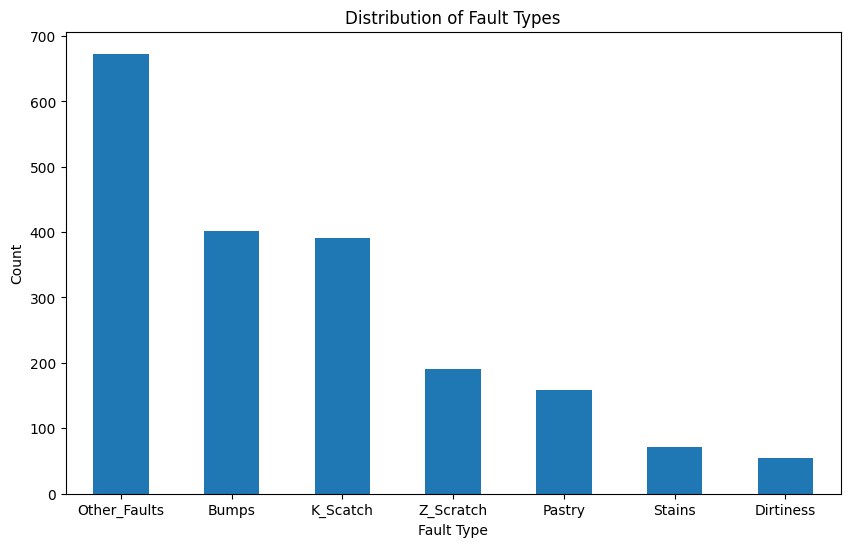

Fault
Other_Faults    673
Bumps           402
K_Scatch        391
Z_Scratch       190
Pastry          158
Stains           72
Dirtiness        55
Name: count, dtype: int64


In [29]:
# TODO: Implement
plt.figure(figsize=(10, 6))
df_2['Fault'].value_counts().plot(kind='bar')
plt.title('Distribution of Fault Types')
plt.xlabel('Fault Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Display the counts of target classes
print(df_2['Fault'].value_counts())

### 2.2 Remove outliers

Outliers will be removed from "df_2" resulting in "df_3". The following tasks will be implemented using "df_3"

In [30]:
def remove_outliers(df, target_column):
    dfc = df.copy()  # Create a copy of the DataFrame
    columns_to_filter = dfc.columns.difference([target_column])  # Exclude the target column
    upper_limits = dfc[columns_to_filter].quantile(0.99)  # Calculate the 99th percentile for each column
    lower_limits = dfc[columns_to_filter].quantile(0.01)  # Calculate the 1th percentile for each column
    
    for colname in columns_to_filter:  # Iterate over columns except the target column
        col = dfc[colname]
        # Keep rows where the value is between the lower and upper limits, or is NaN
        dfc = dfc[
            ((col <= upper_limits[colname]) & (col >= lower_limits[colname]))
            | col.isna()
        ]
    return dfc  # Return the filtered DataFrame

# Assuming df is defined and target column name is 'target'
df_3= remove_outliers(df_2, 'Fault')
display(df_3.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1630 entries, 0 to 1940
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1630 non-null   int64  
 1   X_Maximum              1630 non-null   int64  
 2   Y_Minimum              1630 non-null   int64  
 3   Y_Maximum              1630 non-null   int64  
 4   Pixels_Areas           1630 non-null   int64  
 5   X_Perimeter            1630 non-null   int64  
 6   Y_Perimeter            1630 non-null   int64  
 7   Sum_of_Luminosity      1630 non-null   int64  
 8   Minimum_of_Luminosity  1630 non-null   int64  
 9   Maximum_of_Luminosity  1630 non-null   int64  
 10  Length_of_Conveyer     1630 non-null   int64  
 11  TypeOfSteel_A300       1630 non-null   int64  
 12  TypeOfSteel_A400       1630 non-null   int64  
 13  Steel_Plate_Thickness  1630 non-null   int64  
 14  Edges_Index            1630 non-null   float64
 15  Empty_Ind

None

In [31]:
# Separate features and target
y = df_3.pop('Fault')
X = df_3

### 2.3 Data Splitting

In [32]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

### 2.4  ✏️ Applying  Multinomial Logistic Regression (Custom Implementaion)
#### 2.4.1 Pipeline_5
MultinomialLogisticRegressionGD() is a custom Multinomial logistic regression implementation using gradient descent as a solver (optimization algorithm to estimate the parameters). It is imported from a python file "LogisticRegression". You can find this python file in ILIAS or in GitHub.

* A pipeline_5 is created to streamline the preprocessing and model training process.
* grid_search_5 is used to tune the hyperparameter (learning rate)
* The "f1_weighted" score is used to evaluate model performance. 
* The loss of the best estimator over the iterations (epochs), using the results from grid_search_5, is shown.
* The best model is then evaluated on the test set.
* Training evaluation is performed to check for potential overfitting issues.

In [33]:
# Create a pipeline
pipeline_5 = Pipeline(steps=[
    ('preprocessor', StandardScaler()),
    ('classifier', MultinomialLogisticRegressionGD(random_state=0, epochs=1000))
])

# Define the parameter grid for GridSearchCV
param_grid_5 = {
    'classifier__lr': [0.0001, 0.001, 0.002, 0.005]
    
}

# Initialize GridSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_5 = GridSearchCV(pipeline_5, param_grid_5, cv=cv, scoring='f1_weighted')
grid_search_5.fit(X_train, y_train)

# Show the best hyperparameter
display("Best parameters:", grid_search_5.best_params_)

'Best parameters:'

{'classifier__lr': 0.001}

In the following is the Plot the multi-category cross entropy loss of the best estimator over the iterations (epochs) using the results from grid_search_5.

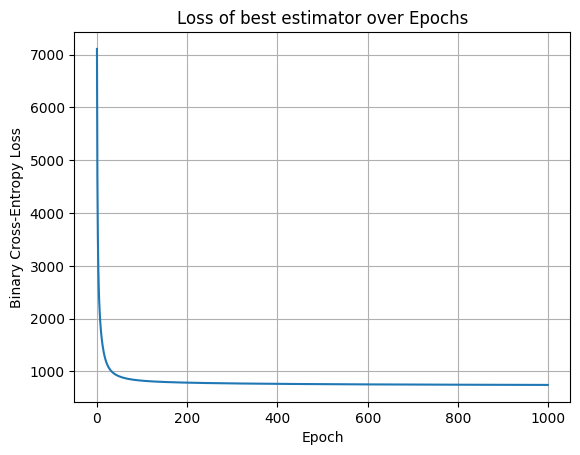

In [34]:
# plot the loss of the best estimater over the iterations (epochs)
plt.plot(np.arange(0, grid_search_5.best_estimator_[1].epochs), grid_search_5.best_estimator_[1].loss)
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Loss of best estimator over Epochs")
plt.grid(True)

The best model is then evaluated on the test set as well the training set. Where, training evaluation is performed to check for potential overfitting issues.


In [35]:
# Training data evaluation
# Predictions and probabilities
y_pred_train_5 = grid_search_5.predict(X_train)

# Classification report
print("Classification Report for Training:\n", classification_report(y_train, y_pred_train_5))

# Testing data evaluation
# Predictions and probabilities
y_pred_test_5 = grid_search_5.predict(X_test)
y_pred_test_proba_5 = grid_search_5.predict_proba(X_test)

# Classification report
print("Classification Report for Testing:\n", classification_report(y_test, y_pred_test_5))

Classification Report for Training:
               precision    recall  f1-score   support

       Bumps       0.65      0.63      0.64       252
   Dirtiness       0.74      0.50      0.60        34
    K_Scatch       0.95      0.95      0.95       237
Other_Faults       0.65      0.69      0.67       376
      Pastry       0.62      0.56      0.59        90
      Stains       0.97      0.91      0.94        32
   Z_Scratch       0.81      0.86      0.83       120

    accuracy                           0.74      1141
   macro avg       0.77      0.73      0.75      1141
weighted avg       0.74      0.74      0.74      1141

Classification Report for Testing:
               precision    recall  f1-score   support

       Bumps       0.60      0.63      0.61       108
   Dirtiness       0.69      0.60      0.64        15
    K_Scatch       0.92      0.97      0.95       101
Other_Faults       0.61      0.59      0.60       161
      Pastry       0.72      0.54      0.62        39
     

Calculating the Average Precision Score and the ROC-AUC Score for the best model for each class

In [36]:
# Predict probabilities for the test set
y_scores_5 = grid_search_5.predict_proba(X_test)

# Calculate AP and ROC AUC for each class
average_precision_5 = average_precision_score(y_test, y_scores_5, average=None)
roc_auc_5 = roc_auc_score(y_test, y_scores_5, multi_class='ovr', average= None)

print(f"Average Precision Scores: {average_precision_5}")
print(f"ROC AUC Scores: {roc_auc_5}")

Average Precision Scores: [0.61327429 0.63433452 0.98878621 0.70026877 0.73020987 0.95135073
 0.89804368]
ROC AUC Scores: [0.88305628 0.96779184 0.99581505 0.81678912 0.9588604  0.99789474
 0.98209329]


### 2.5 Applying Multinominal Logistic Regression (from scikit-learn)
#### ✏️ 2.5.1 Pipeline_6
LogisticRegression() classifier from scikit-learn is applied. This is the same classifier used for binary classification, but only four out of the six solvers support multiclass classification problems: ['sag', 'saga', 'lbfgs', 'newton-cg']. [Here ia a description of the solvers](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

<br>

1. Set up pipeline_6 
* Standarize the features
* Use the classifier: LogisticRegression(max_iter=1000)
* Tune the hyperparameters:
  * 'classifier__solver': ['sag', 'saga','lbfgs', 'newton-cg']
* Perform a grid search (grid_search_6) with 5 StratifiedKFold cross-validation to find the best model parameters. 
 * scoring ='f1_weighted'
* Display the best hyperparameters.


In [37]:
# TODO: Implement
# Create a pipeline
pipeline_6 = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Define the parameter grid for GridSearchCV
param_grid_6 = {
    'classifier__solver': ['sag', 'saga','lbfgs', 'newton-cg']
    
}

# Initialize GridSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_6 = GridSearchCV(pipeline_6, param_grid_6, cv=cv, scoring='f1_weighted')
grid_search_6.fit(X_train, y_train)

# Show the best hyperparameter
display("Best parameters:", grid_search_6.best_params_)

'Best parameters:'

{'classifier__solver': 'sag'}

2. Evaluate the best model on training set and test set using confusion matrix and classification report from scikit-learn

In [38]:
# TODO: Implement
# Training data evaluation
# Predictions and probabilities
y_pred_train_6 = grid_search_5.predict(X_train)

# Classification report
print("Classification Report for Training:\n", classification_report(y_train, y_pred_train_6))

# Testing data evaluation
# Predictions and probabilities
y_pred_test_6 = grid_search_6.predict(X_test)
y_pred_test_proba_6 = grid_search_6.predict_proba(X_test)

# Classification report
print("Classification Report for Testing:\n", classification_report(y_test, y_pred_test_6))

Classification Report for Training:
               precision    recall  f1-score   support

       Bumps       0.65      0.63      0.64       252
   Dirtiness       0.74      0.50      0.60        34
    K_Scatch       0.95      0.95      0.95       237
Other_Faults       0.65      0.69      0.67       376
      Pastry       0.62      0.56      0.59        90
      Stains       0.97      0.91      0.94        32
   Z_Scratch       0.81      0.86      0.83       120

    accuracy                           0.74      1141
   macro avg       0.77      0.73      0.75      1141
weighted avg       0.74      0.74      0.74      1141

Classification Report for Testing:
               precision    recall  f1-score   support

       Bumps       0.61      0.64      0.62       108
   Dirtiness       0.67      0.53      0.59        15
    K_Scatch       0.92      0.95      0.94       101
Other_Faults       0.62      0.63      0.63       161
      Pastry       0.69      0.51      0.59        39
     

3. Calculate the Average Precision Score and the ROC-AUC Score for the best model for each class.

In [39]:
# TODO: Implement
# Predict probabilities for the test set
y_scores_6 = grid_search_6.predict_proba(X_test)

# Calculate AP and ROC AUC for each class
average_precision_6 = average_precision_score(y_test, y_scores_6, average=None)
roc_auc_6 = roc_auc_score(y_test, y_scores_6, multi_class='ovr', average= None)

print(f"Average Precision Scores: {average_precision_6}")
print(f"ROC AUC Scores: {roc_auc_6}")

Average Precision Scores: [0.61124141 0.64289213 0.98831563 0.70695526 0.71960148 0.95730311
 0.89719472]
ROC AUC Scores: [0.88266744 0.97004219 0.99548331 0.81820936 0.95692308 0.99834586
 0.98137703]


### 2.6 Applying One-vs-Rest (One-vs-All)
 One-vs-Rest (One-vs-All) "as explained during the lecture" is a strategy for multiclass classification problems where the model trains one classifier per class. For each classifier, the class is fitted against all the other classes. 

#### ✏️ 2.6.1 Pipeline_7
OneVsRestClassifier() classifier from scikit-learn is applied. 
* A pipeline_7 is created. It includes StandardScaler and OneVsRestClassifier with LogisticRegression(max_iter=1000) as the base classifier.
* grid_search_7 is used to tune the hyperparameter (solver) for the logistic regression estimator within OneVsRestClassifier.
* All six solvers of LogisticRegression from scikit-learn can be involved in this case, as the multiclass classification problem is handled as a set of binary classification problems.
* The best hyperparameters found by grid_search_7 are displayed, and the best model is then evaluated on the test set.

In [40]:
# Create pipeline
pipeline_7 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', OneVsRestClassifier(LogisticRegression(max_iter=1000)))
])

# Define hyperparameters
param_grid_7 = {
    'classifier__estimator__solver': ['sag', 'saga','lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky']
}

# Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV
grid_search_7 = GridSearchCV(pipeline_7, param_grid_7, cv=cv, scoring='f1_weighted')
grid_search_7.fit(X_train, y_train)

# Show the best hyperparameter
display("Best parameters:", grid_search_7.best_params_)

'Best parameters:'

{'classifier__estimator__solver': 'lbfgs'}

1. Evaluate the best model on training set and test set using confusion matrix and classification report from scikit-learn

In [41]:
# TODO: Implement
# Training data evaluation
# Predictions and probabilities
y_pred_train_7 = grid_search_7.predict(X_train)

# Classification report
print("Classification Report for Training:\n", classification_report(y_train, y_pred_train_7))

# Testing data evaluation
# Predictions and probabilities
y_pred_test_7 = grid_search_7.predict(X_test)
y_pred_test_proba_7 = grid_search_7.predict_proba(X_test)

# Classification report
print("Classification Report for Testing:\n", classification_report(y_test, y_pred_test_7))

Classification Report for Training:
               precision    recall  f1-score   support

       Bumps       0.64      0.65      0.65       252
   Dirtiness       0.80      0.47      0.59        34
    K_Scatch       0.97      0.95      0.96       237
Other_Faults       0.66      0.70      0.68       376
      Pastry       0.61      0.51      0.56        90
      Stains       0.97      0.91      0.94        32
   Z_Scratch       0.82      0.87      0.84       120

    accuracy                           0.74      1141
   macro avg       0.78      0.72      0.74      1141
weighted avg       0.74      0.74      0.74      1141

Classification Report for Testing:
               precision    recall  f1-score   support

       Bumps       0.62      0.68      0.65       108
   Dirtiness       0.86      0.40      0.55        15
    K_Scatch       0.93      0.95      0.94       101
Other_Faults       0.62      0.63      0.63       161
      Pastry       0.74      0.51      0.61        39
     

2. Calculate the Average Precision Score and the ROC-AUC Score for the best model for each class.

In [42]:
# TODO: Implement
# Predict probabilities for the test set
y_scores_7 = grid_search_7.predict_proba(X_test)

# Calculate AP and ROC AUC for each class
average_precision_7 = average_precision_score(y_test, y_scores_7, average=None)
roc_auc_7 = roc_auc_score(y_test, y_scores_7, multi_class='ovr', average= None)

print(f"Average Precision Scores: {average_precision_7}")
print(f"ROC AUC Scores: {roc_auc_7}")

Average Precision Scores: [0.60002145 0.68942692 0.98799533 0.70823381 0.7010872  0.96279762
 0.88424341]
ROC AUC Scores: [0.87241178 0.96722925 0.9950495  0.8188532  0.95111111 0.99849624
 0.98025786]


Below is computing and plotting the ROC and Precision-Recall curves, along with their AUC values, for each class using the results from grid_search_7.

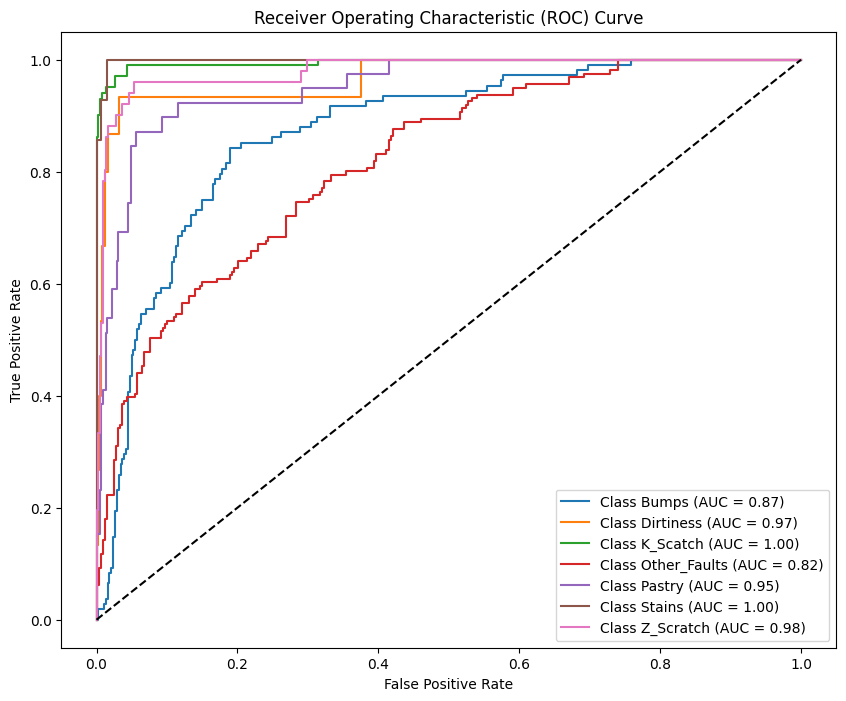

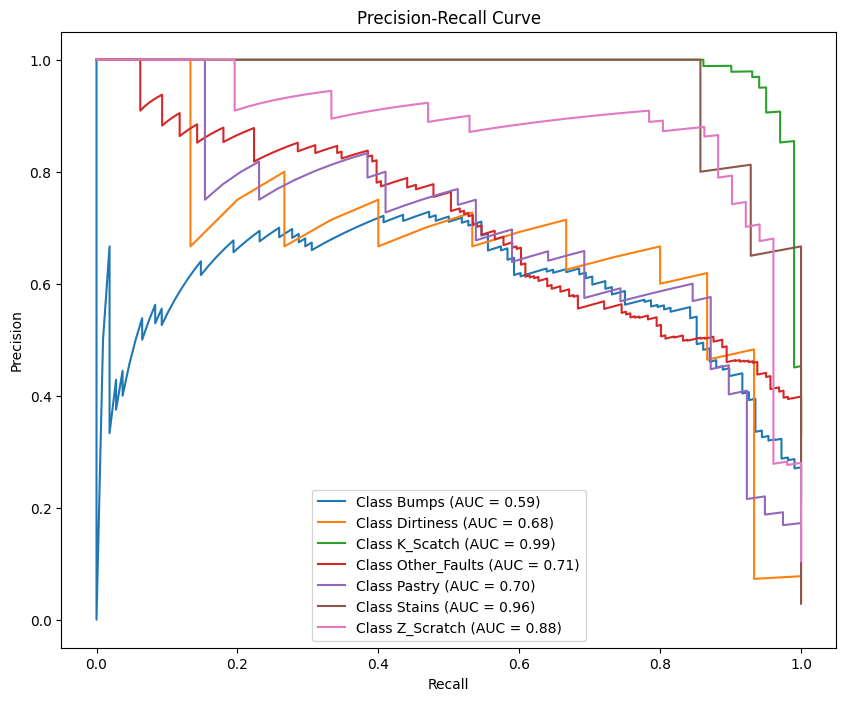

In [43]:
# Compute ROC Curve and ROC AUC
fpr = {}
tpr = {}
roc_auc = {}
y_scores_7 = grid_search_7.predict_proba(X_test)

for i, label in enumerate(grid_search_7.best_estimator_.classes_):
    fpr[label], tpr[label], _ = roc_curve(y_test == label, y_scores_7[:, i])
    roc_auc[label] = auc(fpr[label], tpr[label])

# Plot ROC Curve
plt.figure(figsize=(10, 8))
for label in grid_search_7.best_estimator_.classes_:
    plt.plot(fpr[label], tpr[label], label=f'Class {label} (AUC = {roc_auc[label]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

# Compute Precision-Recall Curve and AUC
precision = {}
recall = {}
pr_auc = {}

for i, label in enumerate(grid_search_7.best_estimator_.classes_):
    precision[label], recall[label], _ = precision_recall_curve(y_test == label, y_scores_7[:, i])
    pr_auc[label] = auc(recall[label], precision[label])

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 8))
for label in grid_search_7.best_estimator_.classes_:
    plt.plot(recall[label], precision[label], label=f'Class {label} (AUC = {pr_auc[label]:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()


#### ✏️ 2.6.2 Optional: Pipeline_8
Set up pipeline_8
* Add a PCA step to pipeline_8 before the classifier 
* grid_search_8 is used to tune the hyperparameters (solver) for the logistic regression estimator within OneVsRestClassifier and the number of components of PCA
* Display the best hyperparameters found by grid_search_8
* Evaluate the best model on the test set (classification report)
* Discuss the results

In [44]:
# TODO: Implement
# Set up pipeline_8
pipeline_8 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', OneVsRestClassifier(LogisticRegression(max_iter=1000)))
])
# Define hyperparameters
param_grid_8 = {
    'classifier__estimator__solver': ['sag', 'saga', 'lbfgs', 'newton-cg'],
    'pca__n_components': np.arange(2, 21, 1)
}

# Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV
grid_search_8 = GridSearchCV(pipeline_8, param_grid_8, cv=cv, scoring='f1_weighted')
grid_search_8.fit(X_train, y_train)

# Show the best hyperparameters
print("Best parameters:", grid_search_8.best_params_)

# Testing data evaluation
# Predictions and probabilities
y_pred_test_8 = grid_search_8.predict(X_test)
y_pred_test_proba_8 = grid_search_8.predict_proba(X_test)

# Classification report
print("Classification Report for Testing:\n", classification_report(y_test, y_pred_test_8))

#results
# the results are not improved with the PCA.

Best parameters: {'classifier__estimator__solver': 'saga', 'pca__n_components': 13}
Classification Report for Testing:
               precision    recall  f1-score   support

       Bumps       0.59      0.66      0.62       108
   Dirtiness       0.88      0.47      0.61        15
    K_Scatch       0.90      0.95      0.92       101
Other_Faults       0.61      0.61      0.61       161
      Pastry       0.63      0.31      0.41        39
      Stains       0.81      0.93      0.87        14
   Z_Scratch       0.80      0.88      0.84        51

    accuracy                           0.70       489
   macro avg       0.75      0.69      0.70       489
weighted avg       0.70      0.70      0.69       489

